## Análise de Convergência dos estados brasileiros considerando indicadores utilizados pelo Eurofound

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

# Indicadores relacionados ao Índice de Desenvolvimento Humano

### PNAD Contínua

In [8]:
arquivo = "ADH_BASE_RADAR_2012-2021.xlsx"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx


In [9]:
df_mul_siafi_ibge = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx')

In [10]:
df_mul_siafi_ibge.head(11)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,39808859,10304212,10609288,150994845,10076087,23924348,140385557,116461209,15249133,84277753
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,39055262,9986737,10521249,153338252,10336071,24034903,142817003,118782100,15820311,86108710
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,38765780,9687655,10446675,155356978,10224771,23840076,144910303,121070227,16425141,87308460
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,38189476,9314133,10401307,157576293,10394554,23851445,147174986,123323541,17060247,87756538
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,37694949,9288033,10375148,159692542,10242815,23779687,149317393,125537706,17728449,87110394
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,36965134,9178387,9987551,161671766,10306849,23975663,151684215,127708552,18431296,87616245
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,36460225,9041166,9641591,163492349,10093878,23998725,153850757,129852032,19168661,89281706
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,35999274,8951264,9389698,165329825,10194743,23952392,155940127,131987735,19941230,91579200
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,35750038,8751715,9357153,167005197,9806225,23521448,157648044,134126596,20748553,83946549
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,35708677,8708856,9273169,168679921,9546945,23143737,159406751,136263014,21590309,86645408


In [11]:
df_mul_siafi_ibge.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

In [12]:
df_dim_eco_gini = df_mul_siafi_ibge.drop(columns=['IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'])

In [13]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI
0,2012,BRASIL,NaN,NaN,0.540
1,2013,BRASIL,NaN,NaN,0.532
2,2014,BRASIL,NaN,NaN,0.526
3,2015,BRASIL,NaN,NaN,0.524
4,2016,BRASIL,NaN,NaN,0.537


In [14]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   GINI       490 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.3+ KB


In [15]:
df_dim_eco_gini['ANO'] = pd.to_datetime(df_dim_eco_gini['ANO'], format='%Y')

In [16]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ANO        490 non-null    datetime64[ns]
 1   AGREGACAO  490 non-null    object        
 2   CODIGO     480 non-null    float64       
 3   NOME       480 non-null    object        
 4   GINI       490 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 19.3+ KB


In [17]:
import pandas as pd

# Extrair o ano da coluna "Referência"
df_dim_eco_gini['Ano'] = df_dim_eco_gini['ANO'].dt.year


In [18]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
0,2012-01-01,BRASIL,NaN,NaN,0.540,2012
1,2013-01-01,BRASIL,NaN,NaN,0.532,2013
2,2014-01-01,BRASIL,NaN,NaN,0.526,2014
3,2015-01-01,BRASIL,NaN,NaN,0.524,2015
4,2016-01-01,BRASIL,NaN,NaN,0.537,2016


In [36]:
df_dim_eco_gini_est = df_dim_eco_gini.dropna(how='any')
df_dim_eco_gini_est.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
485,2021-01-01,RM_RIDE,41.0,Região Metropolitana de Curitiba (PR),0.488,2021
486,2021-01-01,RM_RIDE,42.0,Região Metropolitana de Florianópolis (SC),0.484,2021
487,2021-01-01,RM_RIDE,43.0,Região Metropolitana de Porto Alegre (RS),0.491,2021
488,2021-01-01,RM_RIDE,51.0,Região Metropolitana de Vale do Rio Cuiabá (MT),0.484,2021
489,2021-01-01,RM_RIDE,52.0,Região Metropolitana de Goiânia (GO),0.500,2021


In [37]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_eco_gini_est = df_dim_eco_gini_est[~df_dim_eco_gini_est['AGREGACAO'].str.contains('RM_RIDE')]

In [38]:
df_dim_eco_gini_est.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI,Ano
275,2021-01-01,UF,43.0,Rio Grande do Sul,0.468,2021
276,2021-01-01,UF,50.0,Mato Grosso do Sul,0.496,2021
277,2021-01-01,UF,51.0,Mato Grosso,0.461,2021
278,2021-01-01,UF,52.0,Goiás,0.467,2021
279,2021-01-01,UF,53.0,Distrito Federal,0.566,2021


In [39]:
df_dim_eco_gini_est = df_dim_eco_gini_est.drop(columns=['ANO', 'AGREGACAO', 'CODIGO'])

In [40]:
df_dim_eco_gini_est.tail()

,NOME,GINI,Ano
275,Rio Grande do Sul,0.468,2021
276,Mato Grosso do Sul,0.496,2021
277,Mato Grosso,0.461,2021
278,Goiás,0.467,2021
279,Distrito Federal,0.566,2021


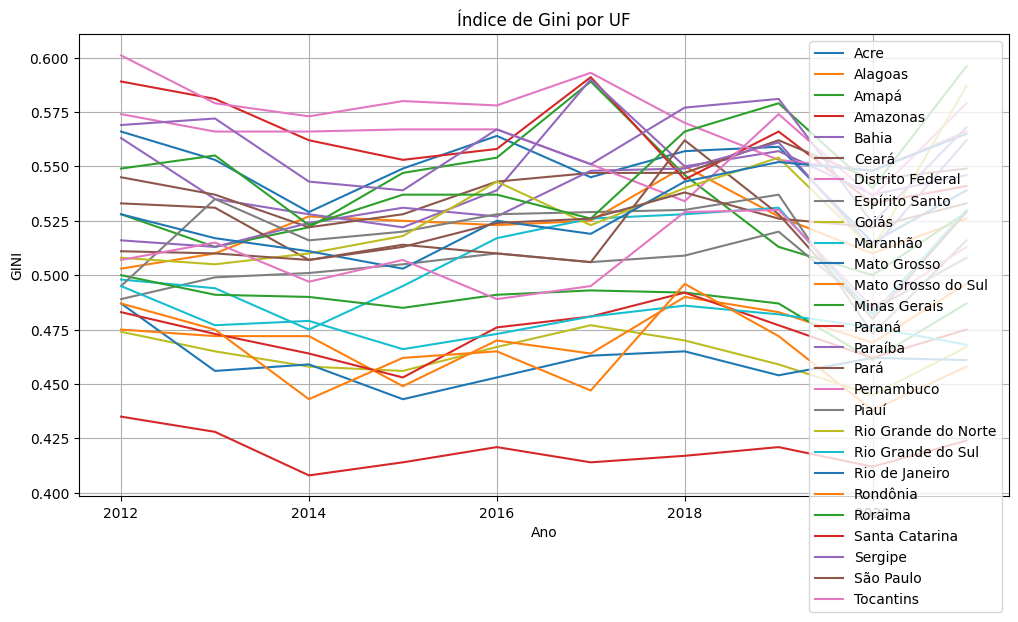

In [24]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_eco_gini_est.groupby('NOME'):
    plt.plot(dados_território['Ano'], dados_território['GINI'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Índice de Gini por UF')
plt.xlabel('Ano')
plt.ylabel('GINI')
plt.legend()
plt.grid(True)

plt.show()

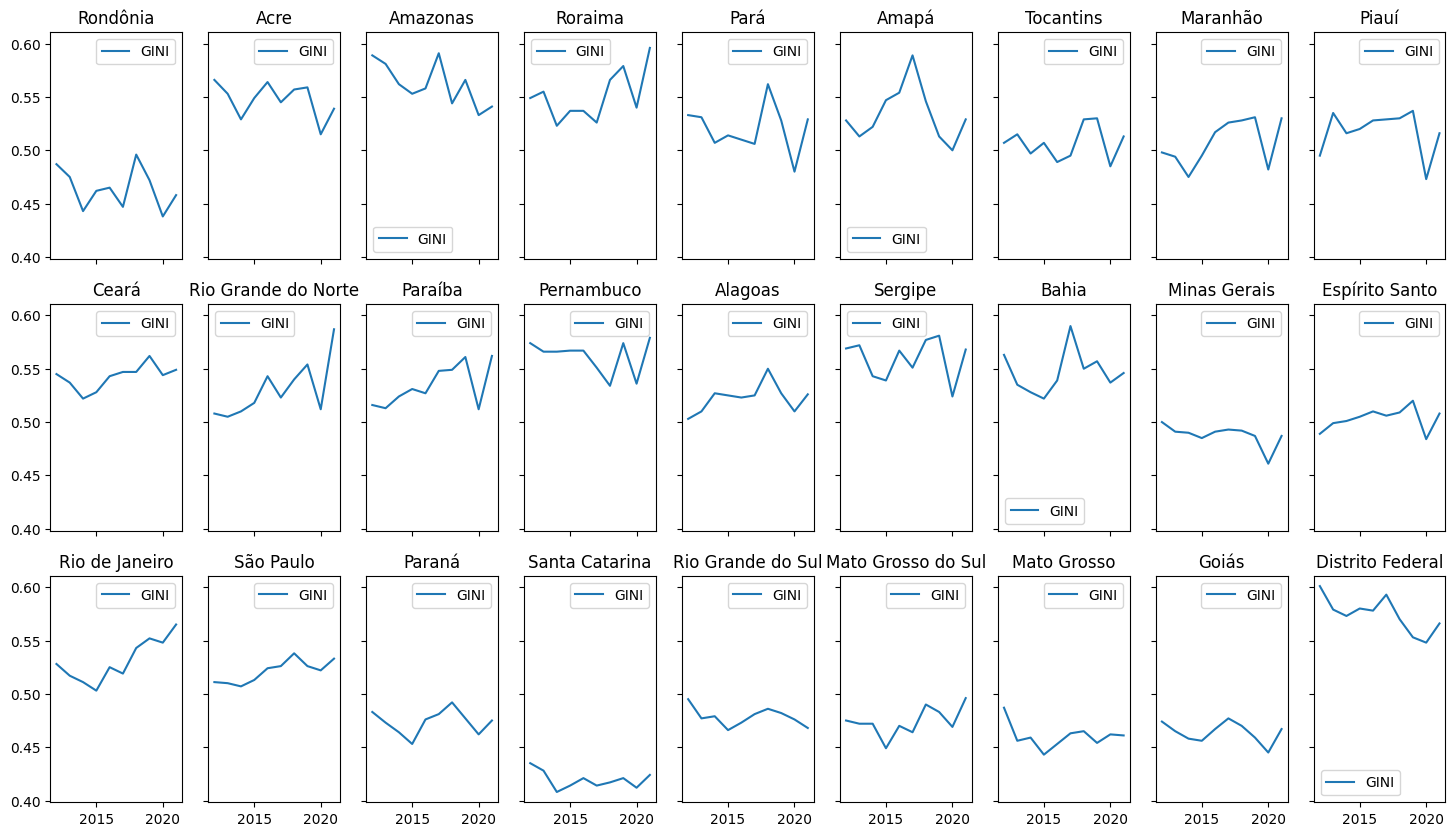

In [25]:
# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_eco_gini_est['NOME'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_eco_gini_est[df_dim_eco_gini_est['NOME'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='Ano', y='GINI', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [100]:
pivot_df_dim_eco_gini_est = df_dim_eco_gini_est.pivot(index='Ano', columns='NOME', values='GINI')

In [102]:
pivot_df_dim_eco_gini_est.head()

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
2012,0.566,0.503,0.528,0.589,0.563,0.545,0.601,0.489,0.474,0.498,...,0.495,0.508,0.495,0.528,0.487,0.549,0.435,0.569,0.511,0.507
2013,0.553,0.510,0.513,0.581,0.535,0.537,0.579,0.499,0.465,0.494,...,0.535,0.505,0.477,0.517,0.475,0.555,0.428,0.572,0.510,0.515
2014,0.529,0.527,0.522,0.562,0.528,0.522,0.573,0.501,0.458,0.475,...,0.516,0.510,0.479,0.511,0.443,0.523,0.408,0.543,0.507,0.497
2015,0.549,0.525,0.547,0.553,0.522,0.528,0.580,0.505,0.456,0.495,...,0.520,0.518,0.466,0.503,0.462,0.537,0.414,0.539,0.513,0.507
2016,0.564,0.523,0.554,0.558,0.539,0.543,0.578,0.510,0.467,0.517,...,0.528,0.543,0.473,0.525,0.465,0.537,0.421,0.567,0.524,0.489


In [105]:
pivot_df_dim_eco_gini_est.reset_index(inplace=True)
pivot_df_dim_eco_gini_est.rename(columns={'index': 'Ano'}, inplace=True)

In [106]:
pivot_df_dim_eco_gini_est.head()

,Ano,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,2012,0.566,0.503,0.528,0.589,0.563,0.545,0.601,0.489,0.474,...,0.495,0.508,0.495,0.528,0.487,0.549,0.435,0.569,0.511,0.507
1,2013,0.553,0.510,0.513,0.581,0.535,0.537,0.579,0.499,0.465,...,0.535,0.505,0.477,0.517,0.475,0.555,0.428,0.572,0.510,0.515
2,2014,0.529,0.527,0.522,0.562,0.528,0.522,0.573,0.501,0.458,...,0.516,0.510,0.479,0.511,0.443,0.523,0.408,0.543,0.507,0.497
3,2015,0.549,0.525,0.547,0.553,0.522,0.528,0.580,0.505,0.456,...,0.520,0.518,0.466,0.503,0.462,0.537,0.414,0.539,0.513,0.507
4,2016,0.564,0.523,0.554,0.558,0.539,0.543,0.578,0.510,0.467,...,0.528,0.543,0.473,0.525,0.465,0.537,0.421,0.567,0.524,0.489


In [107]:
gini_states_br = pivot_df_dim_eco_gini_est.rename(columns={'Ano': 'time'})

In [108]:
gini_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,2012,0.566,0.503,0.528,0.589,0.563,0.545,0.601,0.489,0.474,...,0.495,0.508,0.495,0.528,0.487,0.549,0.435,0.569,0.511,0.507
1,2013,0.553,0.510,0.513,0.581,0.535,0.537,0.579,0.499,0.465,...,0.535,0.505,0.477,0.517,0.475,0.555,0.428,0.572,0.510,0.515
2,2014,0.529,0.527,0.522,0.562,0.528,0.522,0.573,0.501,0.458,...,0.516,0.510,0.479,0.511,0.443,0.523,0.408,0.543,0.507,0.497
3,2015,0.549,0.525,0.547,0.553,0.522,0.528,0.580,0.505,0.456,...,0.520,0.518,0.466,0.503,0.462,0.537,0.414,0.539,0.513,0.507
4,2016,0.564,0.523,0.554,0.558,0.539,0.543,0.578,0.510,0.467,...,0.528,0.543,0.473,0.525,0.465,0.537,0.421,0.567,0.524,0.489


In [109]:
#criando arquivo csv final
gini_states_br.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\gini_states_br.csv', encoding='UTF-8')

# PIB estadual

### fonte: ipeadata (http://www.ipeadata.gov.br/Default.aspx)

In [183]:
caminho = 'D:\\docs_mariana\\ProjetosGit\\Convergencia\\ipeadata_pib[16-05-2024-11-46].csv'
#skiprows=1 para tirar o título da tabela
ipeadata_pib = pd.read_csv(caminho, delimiter=';', skiprows=1)


In [184]:
ipeadata_pib.head()

,Sigla,Código,Estado,2017,2018,2019,2020,2021,Unnamed: 8
0,AC,12,Acre,14272941,15331123,15630017,16476371,"21374440,009",NaN
1,AL,27,Alagoas,52851067,54413047,58963729,63202349,"76265620,286",NaN
2,AM,13,Amazonas,93240191,100109235,108181091,116019139,"131531037,762",NaN
3,AP,16,Amapá,15481908,16795207,17496661,18469115,"20099850,517",NaN
4,BA,29,Bahia,268724090,286239541,293240504,305320813,"352617851,769",NaN


In [185]:
ipeadata_pib.columns

Index(['Sigla', 'Código', 'Estado', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 8'],
      dtype='object')

In [186]:
ipeadata_pib = ipeadata_pib.drop(columns = ['Sigla', 'Código','Unnamed: 8'])

In [187]:
ipeadata_pib.head()

,Estado,2017,2018,2019,2020,2021
0,Acre,14272941,15331123,15630017,16476371,"21374440,009"
1,Alagoas,52851067,54413047,58963729,63202349,"76265620,286"
2,Amazonas,93240191,100109235,108181091,116019139,"131531037,762"
3,Amapá,15481908,16795207,17496661,18469115,"20099850,517"
4,Bahia,268724090,286239541,293240504,305320813,"352617851,769"


In [188]:
gni_states_br = ipeadata_pib.melt(id_vars='Estado', var_name='Ano', value_name='pib')

In [189]:
gni_states_br.head()

,Estado,Ano,pib
0,Acre,2017,14272941
1,Alagoas,2017,52851067
2,Amazonas,2017,93240191
3,Amapá,2017,15481908
4,Bahia,2017,268724090


In [190]:
# Reorganizando o DataFrame para ter os estados como colunas e datas como índices
gni_states_br = gni_states_br.pivot(index='Ano', columns='Estado')['pib']

# Removendo o nome da coluna de estados ('Estado')
gni_states_br.columns.name = None

In [191]:
gni_states_br.head()

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
2017,14272941,52851067,15481908,93240191,268724090,147921534,244722249,113399937,191948301,89542757,...,45365541,64305995,423270047,671605668,43516147,12104709,277270237,40711486,2120761635,34108132
2018,15331123,54413047,16795207,100109235,286239541,155903825,254817205,137020055,195681724,98179496,...,50378418,66969562,457293958,758859047,44913978,13369988,298227090,42017981,2210561949,35666183
2019,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,97339938,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941
2020,16476371,63202349,18469115,116019139,305320813,166914536,265847334,138445922,224126112,106915962,...,56391257,71577107,470941846,753823711,51598741,16024276,349275016,45409657,2377638980,43649803
2021,"21374440,009","76265620,286","20099850,517","131531037,762","352617851,769","194884801,547","286943782,027","186336504,77","269627873,9","124980719,954",...,"64028302,817","80180733,093","581283677,312","949300770,395","58170095,726","18202579,49","428570888,752","51861396,886","2719751231,375","51780764,389"


In [192]:
gni_states_br.reset_index(inplace=True)

In [193]:
gni_states_br.head()

,Ano,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,2017,14272941,52851067,15481908,93240191,268724090,147921534,244722249,113399937,191948301,...,45365541,64305995,423270047,671605668,43516147,12104709,277270237,40711486,2120761635,34108132
1,2018,15331123,54413047,16795207,100109235,286239541,155903825,254817205,137020055,195681724,...,50378418,66969562,457293958,758859047,44913978,13369988,298227090,42017981,2210561949,35666183
2,2019,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941
3,2020,16476371,63202349,18469115,116019139,305320813,166914536,265847334,138445922,224126112,...,56391257,71577107,470941846,753823711,51598741,16024276,349275016,45409657,2377638980,43649803
4,2021,"21374440,009","76265620,286","20099850,517","131531037,762","352617851,769","194884801,547","286943782,027","186336504,77","269627873,9",...,"64028302,817","80180733,093","581283677,312","949300770,395","58170095,726","18202579,49","428570888,752","51861396,886","2719751231,375","51780764,389"


In [194]:
gni_states_br.rename(columns={'Ano': 'time'}, inplace=True)

In [195]:
gni_states_br.head()

,time,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,2017,14272941,52851067,15481908,93240191,268724090,147921534,244722249,113399937,191948301,...,45365541,64305995,423270047,671605668,43516147,12104709,277270237,40711486,2120761635,34108132
1,2018,15331123,54413047,16795207,100109235,286239541,155903825,254817205,137020055,195681724,...,50378418,66969562,457293958,758859047,44913978,13369988,298227090,42017981,2210561949,35666183
2,2019,15630017,58963729,17496661,108181091,293240504,163575327,273613711,137345595,208672492,...,52780785,71336780,482464177,779927917,47091336,14292227,323263857,44689483,2348338000,39355941
3,2020,16476371,63202349,18469115,116019139,305320813,166914536,265847334,138445922,224126112,...,56391257,71577107,470941846,753823711,51598741,16024276,349275016,45409657,2377638980,43649803
4,2021,"21374440,009","76265620,286","20099850,517","131531037,762","352617851,769","194884801,547","286943782,027","186336504,77","269627873,9",...,"64028302,817","80180733,093","581283677,312","949300770,395","58170095,726","18202579,49","428570888,752","51861396,886","2719751231,375","51780764,389"


In [ ]:
#criando arquivo csv final
gini_states_br.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\gini_states_br.csv', encoding='UTF-8')